In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N01 = np.random.normal(0,1,size=[200, 3])
N12 = np.random.normal(4,1,size=[200, 3])

In [3]:
from mpl_toolkits import mplot3d

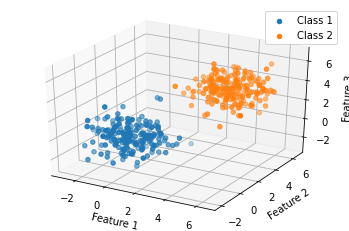

In [4]:
ax = plt.axes(projection='3d')
ax.scatter3D(N01[:,0], N01[:,1], N01[:,2])
ax.scatter3D(N12[:,0], N12[:,1], N12[:,2])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend(['Class 1','Class 2'])


In [5]:
from sklearn.model_selection import train_test_split

y_1 = np.zeros(len(N01))
y_2 = np.ones(len(N12))

X = np.concatenate([N01, N12])
y = np.concatenate([y_1, y_2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print (np.shape(X_train))
print (np.shape(y_train))
print (np.shape(X_test))
print (np.shape(y_test))

(268, 3)
(268,)
(132, 3)
(132,)


In [7]:
def plot_decision_boundary(X_train, y_train, theta):
  x = np.linspace(min(X_train[:,0]), max(X_train[:,0]), 30)
  y = np.linspace(min(X_train[:,1]), max(X_train[:,1]), 30)

  m1 = -theta[2]/theta[3]
  m2 = -theta[1]/theta[3]
  c = -theta[0]/theta[3]

  X, Y = np.meshgrid(x, y)
  Z = m1*X + m2*Y + c

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.scatter3D(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], X_train[:, 2][y_train==0])
  ax.scatter3D(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], X_train[:, 2][y_train==1])
  ax.contour3D(X, Y, Z,80)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.set_zlabel('Feature 3')

In [8]:
anim_decsn = []

def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    
    m, n = X.shape
    
    theta = np.zeros((n+1,1))
    theta_batch = np.zeros((m, n+1, 1))
    
    for i in range(n+1):
        theta[i][0] = random.random()
    
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta_batch[idx] += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
              
        sum = 0
        for i in range(m):
            sum += theta_batch[i]
        theta = sum/m
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        anim_decsn.append(theta)
        # print("Epoch :", epoch+1, "acc :", 1-n_miss/len(X))
        plot_decision_boundary(X, y, theta)
        
    return theta, n_miss_list

<ipython-input-7-5952d961d1bb>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


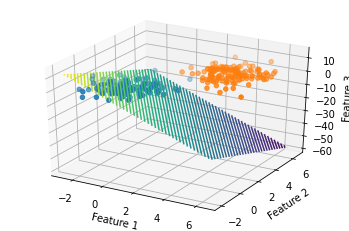

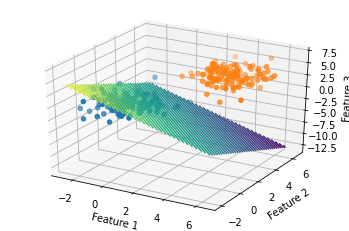

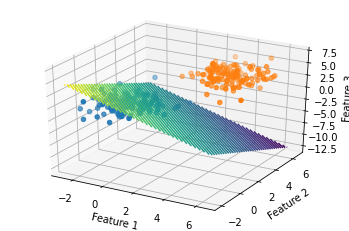

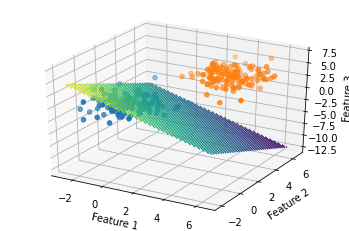

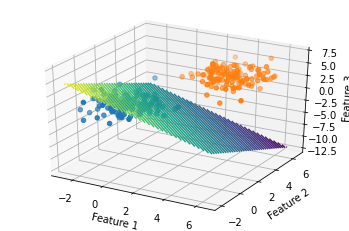

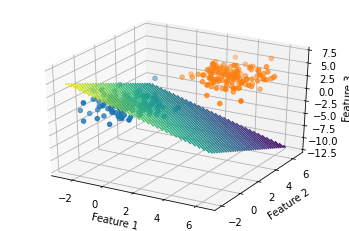

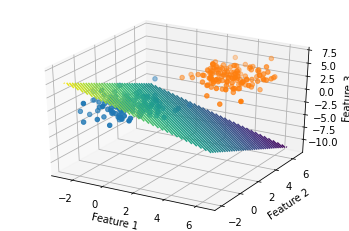

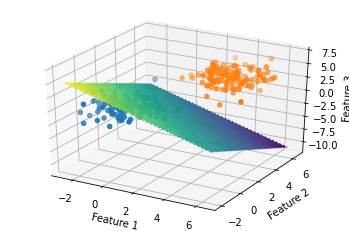

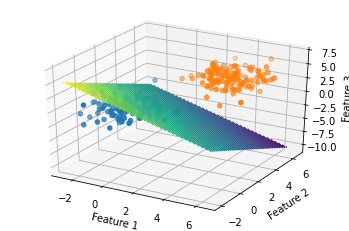

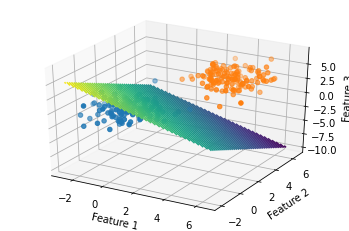

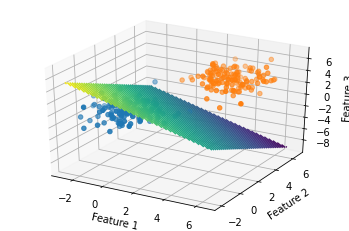

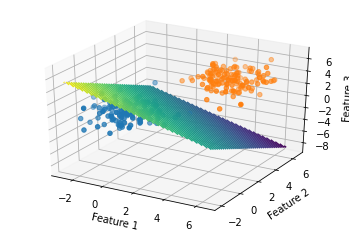

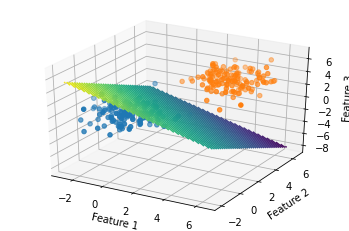

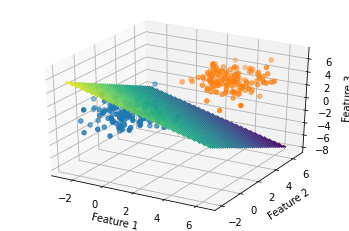

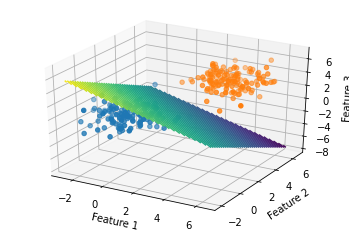

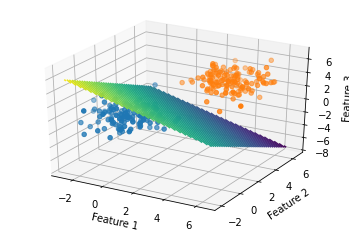

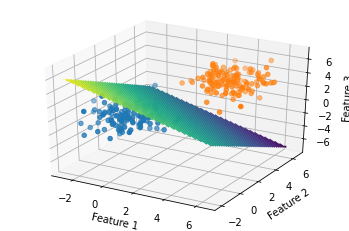

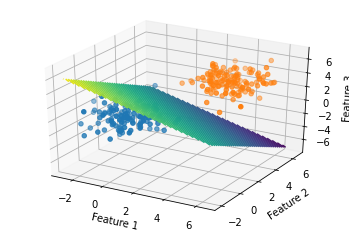

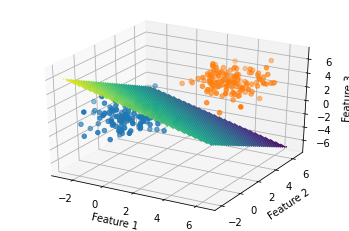

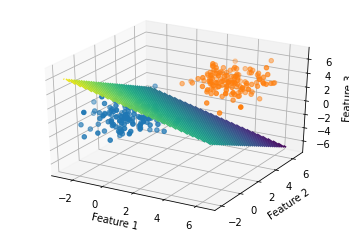

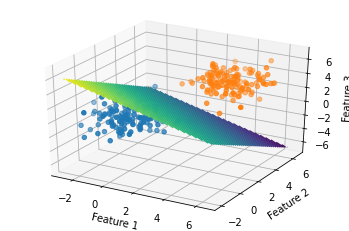

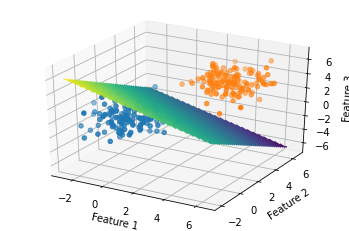

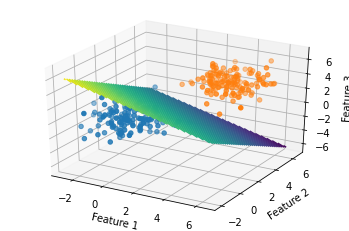

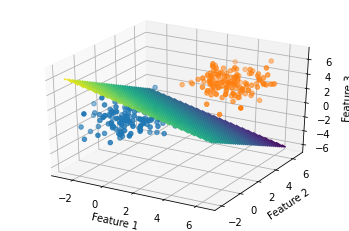

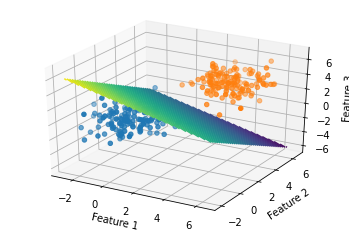

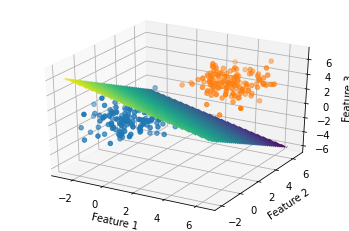

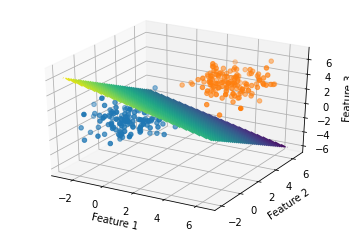

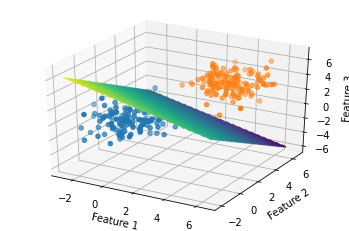

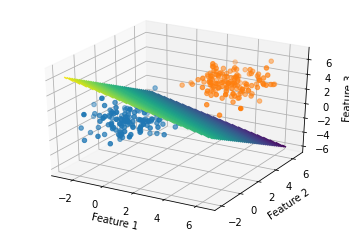

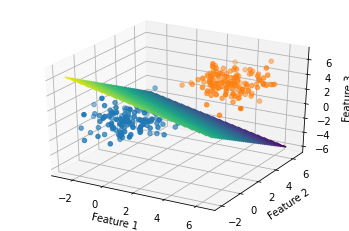

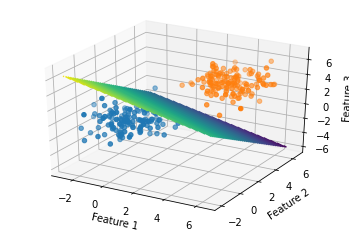

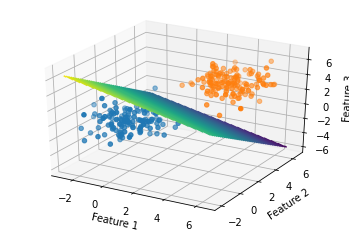

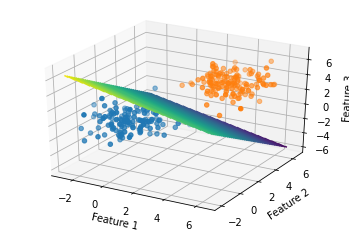

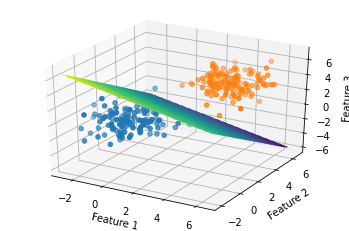

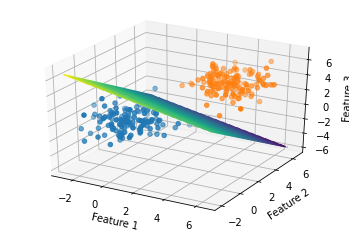

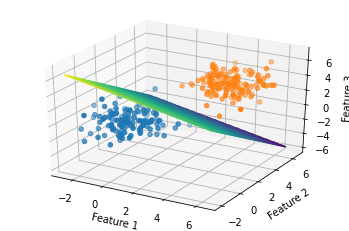

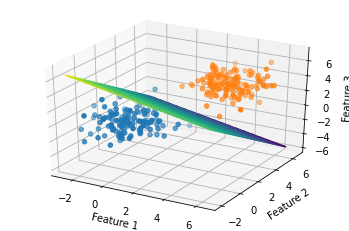

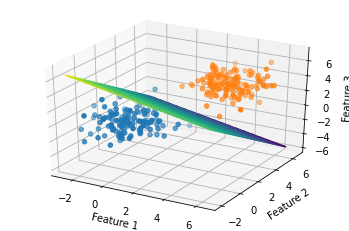

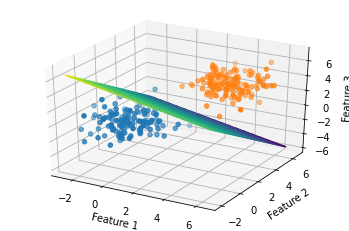

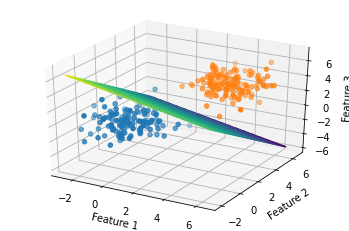

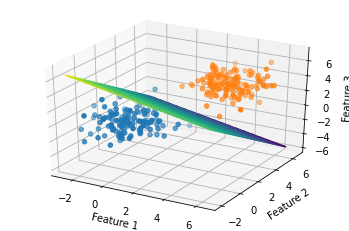

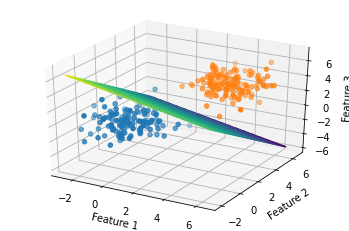

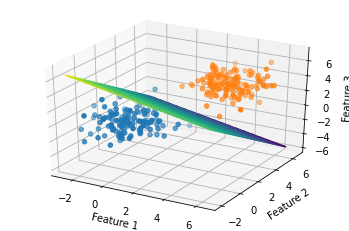

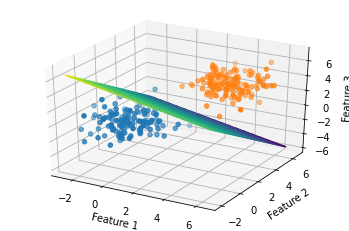

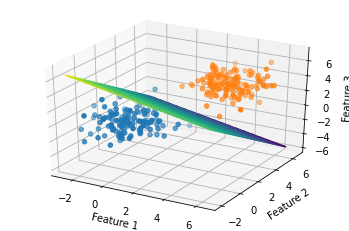

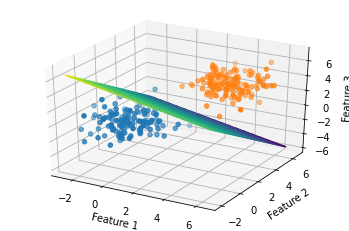

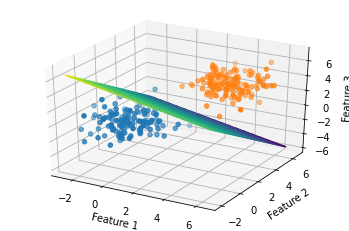

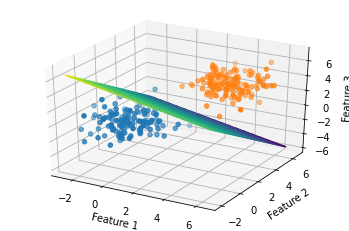

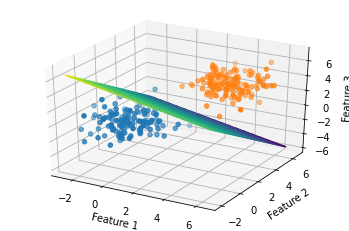

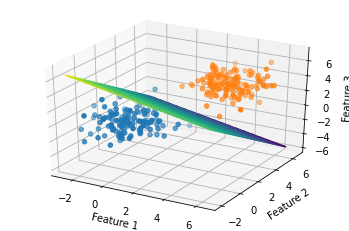

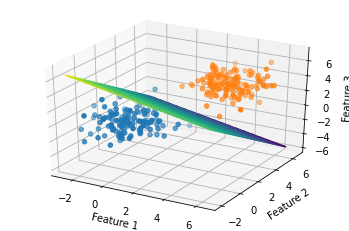

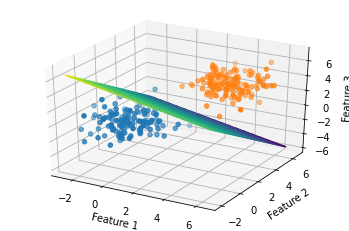

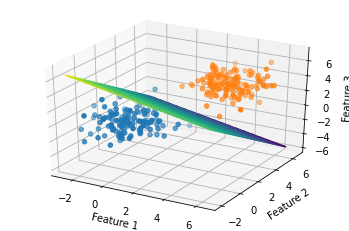

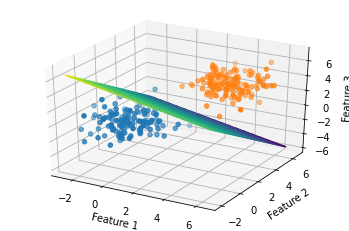

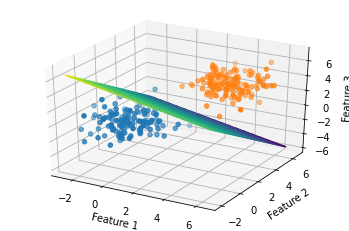

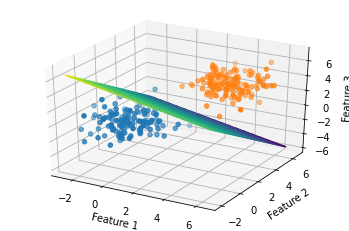

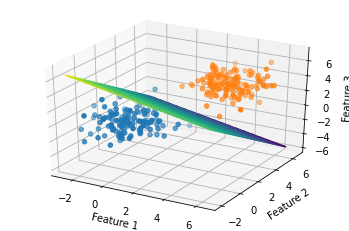

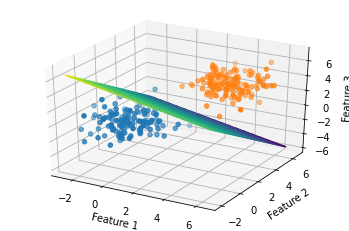

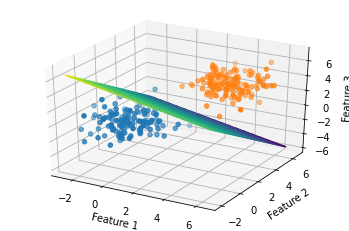

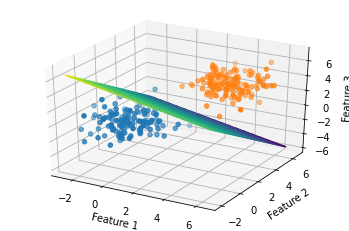

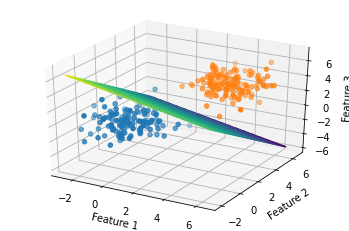

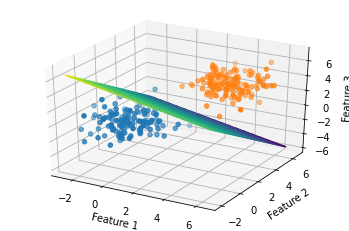

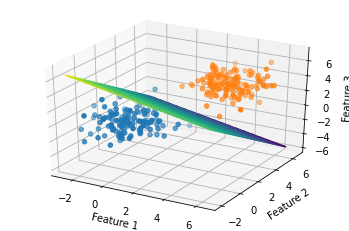

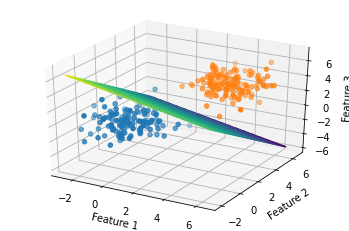

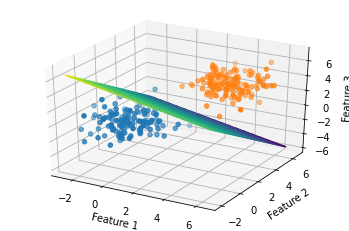

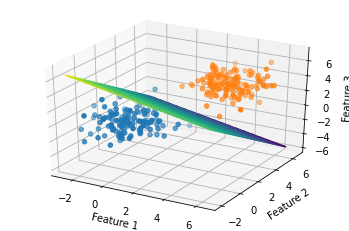

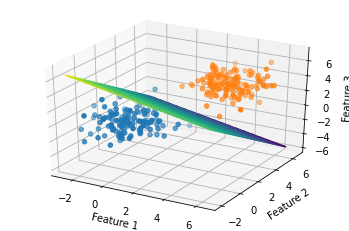

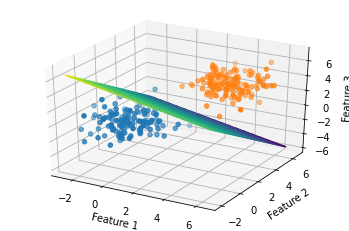

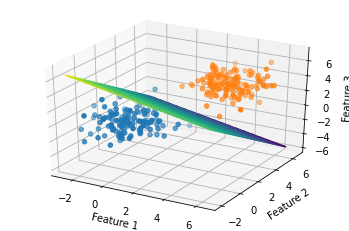

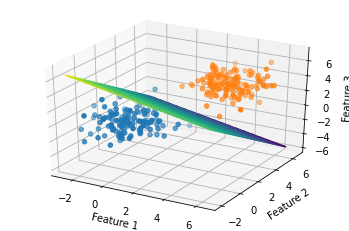

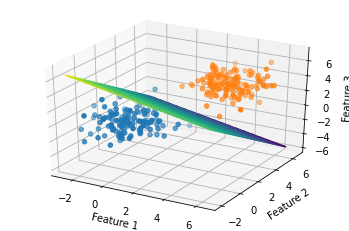

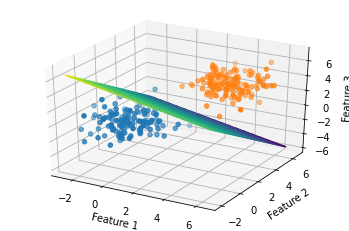

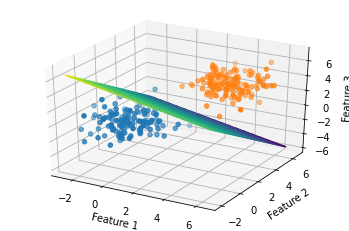

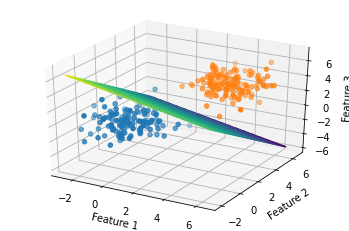

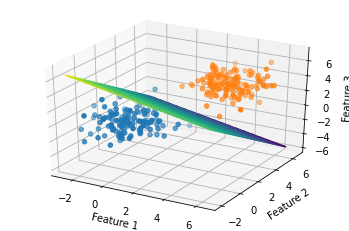

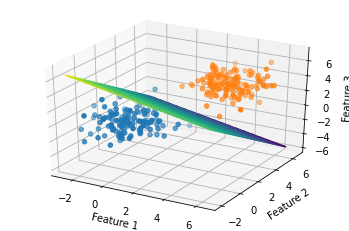

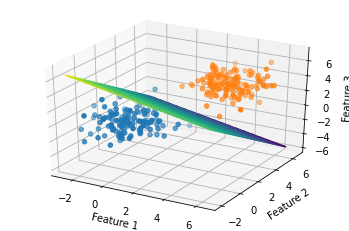

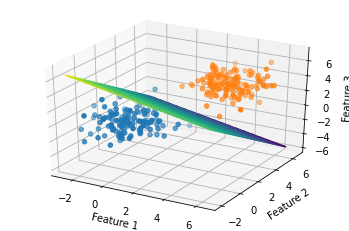

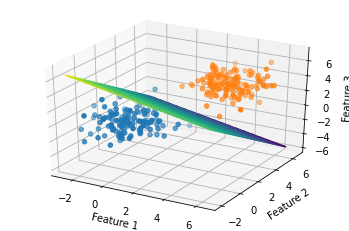

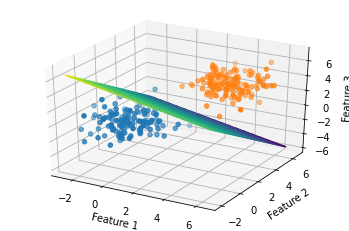

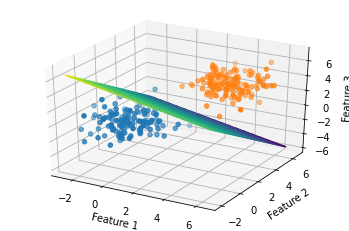

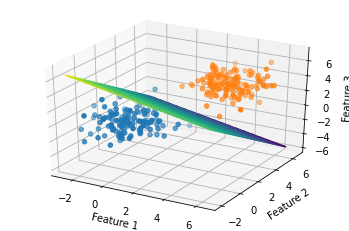

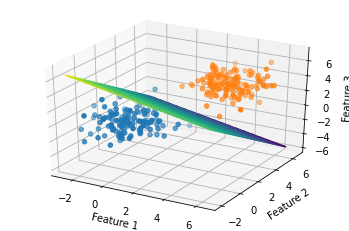

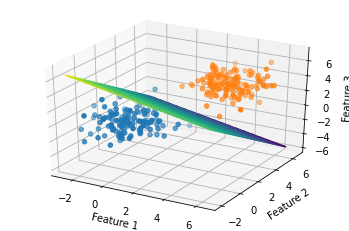

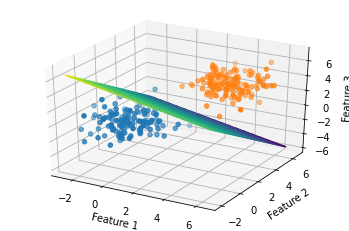

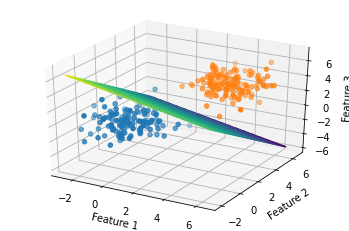

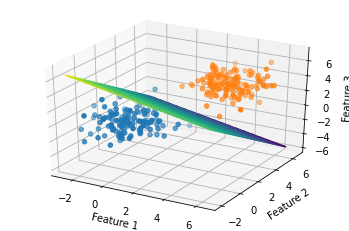

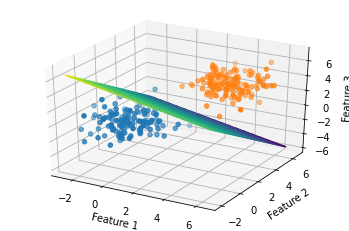

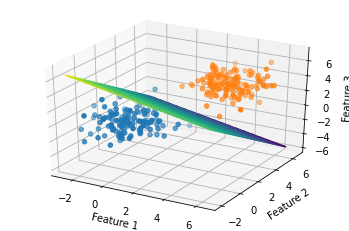

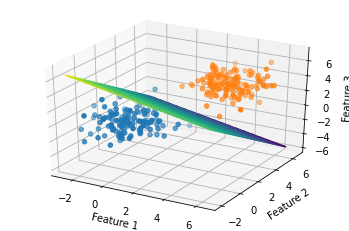

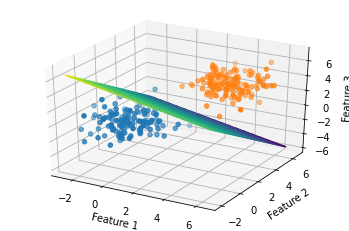

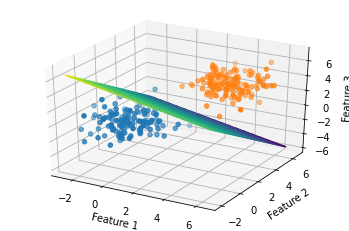

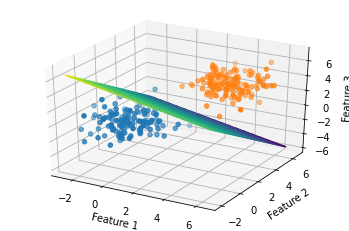

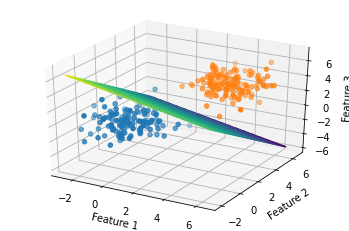

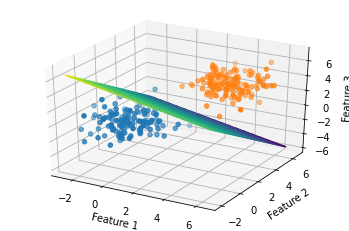

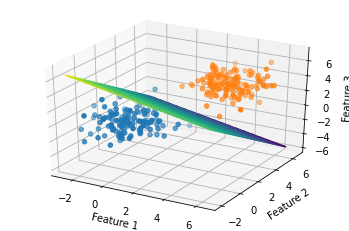

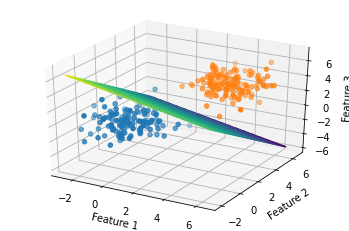

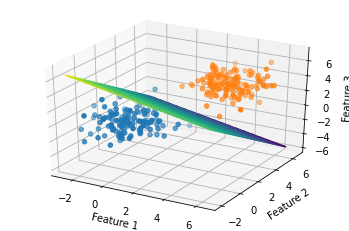

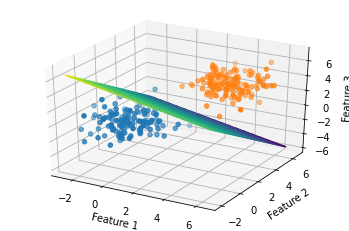

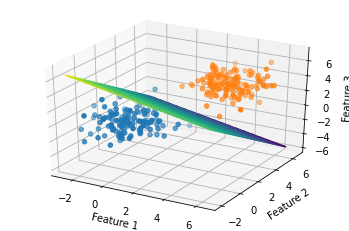

In [9]:
theta, miss_l = perceptron(X_train, y_train, 0.5, 100)

In [10]:
def predict(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1] + weights[3]*test[2] 
  return 1.0 if activation > 0.0 else 0.0

y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(theta, X_test[i]))

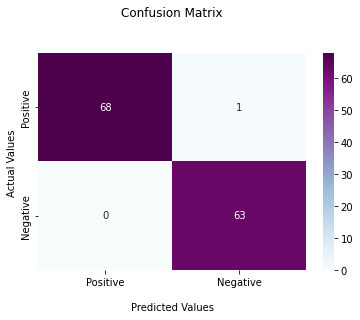

In [11]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [12]:
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
print('True positive: ', cf_matrix[0][0])
print('False positive: ', cf_matrix[0][1])
print('False Negative: ', cf_matrix[1][0])
print('True Negative: ', cf_matrix[1][1],'\n\n')
target=[str(i) for i in range(2)]
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.99 


True positive:  68
False positive:  1
False Negative:  0
True Negative:  63 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.98      1.00      0.99        63

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



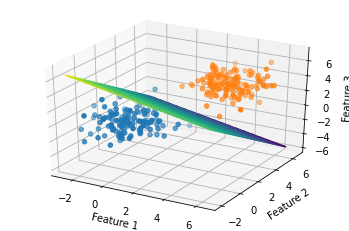

In [13]:
plot_decision_boundary(X_train, y_train, theta)